## Поиск наиболее близкого имени участника


Попытки установить python-levenshtein оказались бездарной тратой времени.

Установим jellyfish

In [8]:
#!pip install jellyfish
import jellyfish

In [37]:
# работает так
print(jellyfish.levenshtein_distance('Анна', 'анна'))
print(jellyfish.levenshtein_distance('Анна'.lower(), 'анна'.lower()))
print(jellyfish.levenshtein_distance('анна-мария', 'анна-иоанна'))
print(jellyfish.levenshtein_distance('анна-иоанна', 'анна-мария'))


1
0
5
5


In [14]:
import numpy as np
import pandas as pd

In [15]:
# что было написано в заявке

claim_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [16]:
# результат расшифровки речи диктора

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

### С библиотекой jellyfish

In [17]:
# посмотрим на распознанные имена
for recognized_name in speech_recognition:
    print(recognized_name)

кучменко она
кущенко оксана
груздь алина
рычихина наталья
шиховцева на
чистова анастасия


In [59]:
rm, rn, ld = [], [], []
for recognized_name in speech_recognition:
    for real_name in claim_list:
        rm.append(recognized_name)
        rn.append(real_name)
        ld.append(jellyfish.levenshtein_distance(recognized_name, real_name))
        #print('{},{},{}'.format(recognized_name, real_name, jellyfish.levenshtein_distance(recognized_name, real_name)))
data_names = pd.DataFrame({'Распознанные ФИ' : rm, 'Настоящие ФИ' : rn, 'Расстояние Левенштейна' : ld})
data_names

,Распознанные ФИ,Настоящие ФИ,Расстояние Левенштейна
0,кучменко она,Шехавцова Анна,11
1,кучменко она,Гречихина Наталья,14
2,кучменко она,Козлова Алена,11
3,кучменко она,Груздева Алина,10
4,кучменко она,Кущенко Анна,5
5,кучменко она,Чистякова Анастасия,15
6,кущенко оксана,Шехавцова Анна,11
7,кущенко оксана,Гречихина Наталья,15
8,кущенко оксана,Козлова Алена,11
9,кущенко оксана,Груздева Алина,11


### Без библиотеки из файла 'recognized_stats.txt'


In [23]:
f = open('recognized_stats.txt', mode = 'r', encoding = 'utf-8')

In [31]:
with open('recognized_stats.txt', mode = 'r', encoding = 'utf-8') as file_object:
    for line in file_object:
        print(line)
    

кучменко она,Шехавцова Анна,11;кучменко она,Гречихина Наталья,14;кучменко она,Козлова Алена,11;кучменко она,Груздева Алина,10;кучменко она,Кущенко Анна,5;кучменко она,Чистякова Анастасия,15

кущенко оксана,Шехавцова Анна,11;кущенко оксана,Гречихина Наталья,15;кущенко оксана,Козлова Алена,11;кущенко оксана,Груздева Алина,11;кущенко оксана,Кущенко Анна,5;кущенко оксана,Чистякова Анастасия,14

груздь алина,Шехавцова Анна,11;груздь алина,Гречихина Наталья,14;груздь алина,Козлова Алена,9;груздь алина,Груздева Алина,5;груздь алина,Кущенко Анна,10;груздь алина,Чистякова Анастасия,16

рычихина наталья,Шехавцова Анна,14;рычихина наталья,Гречихина Наталья,3;рычихина наталья,Козлова Алена,14;рычихина наталья,Груздева Алина,14;рычихина наталья,Кущенко Анна,14;рычихина наталья,Чистякова Анастасия,12

шиховцева на,Шехавцова Анна,6;шиховцева на,Гречихина Наталья,14;шиховцева на,Козлова Алена,9;шиховцева на,Груздева Алина,9;шиховцева на,Кущенко Анна,10;шиховцева на,Чистякова Анастасия,13

чистова анас

In [24]:
# создадим пустой список для записи расстояний
distances = []

In [26]:
# создадим список

lines = [line.strip().split(';') for line in f]

In [33]:
' как работает '.strip()

'как работает'

In [27]:
lines

[['кучменко она,Шехавцова Анна,11',
  'кучменко она,Гречихина Наталья,14',
  'кучменко она,Козлова Алена,11',
  'кучменко она,Груздева Алина,10',
  'кучменко она,Кущенко Анна,5',
  'кучменко она,Чистякова Анастасия,15'],
 ['кущенко оксана,Шехавцова Анна,11',
  'кущенко оксана,Гречихина Наталья,15',
  'кущенко оксана,Козлова Алена,11',
  'кущенко оксана,Груздева Алина,11',
  'кущенко оксана,Кущенко Анна,5',
  'кущенко оксана,Чистякова Анастасия,14'],
 ['груздь алина,Шехавцова Анна,11',
  'груздь алина,Гречихина Наталья,14',
  'груздь алина,Козлова Алена,9',
  'груздь алина,Груздева Алина,5',
  'груздь алина,Кущенко Анна,10',
  'груздь алина,Чистякова Анастасия,16'],
 ['рычихина наталья,Шехавцова Анна,14',
  'рычихина наталья,Гречихина Наталья,3',
  'рычихина наталья,Козлова Алена,14',
  'рычихина наталья,Груздева Алина,14',
  'рычихина наталья,Кущенко Анна,14',
  'рычихина наталья,Чистякова Анастасия,12'],
 ['шиховцева на,Шехавцова Анна,6',
  'шиховцева на,Гречихина Наталья,14',
  'шихо

In [34]:
for line in lines:
    
    for rec in line:
        recognized_name, real_name, distance = rec.split(',')
        print(recognized_name, real_name, distance)

кучменко она Шехавцова Анна 11
кучменко она Гречихина Наталья 14
кучменко она Козлова Алена 11
кучменко она Груздева Алина 10
кучменко она Кущенко Анна 5
кучменко она Чистякова Анастасия 15
кущенко оксана Шехавцова Анна 11
кущенко оксана Гречихина Наталья 15
кущенко оксана Козлова Алена 11
кущенко оксана Груздева Алина 11
кущенко оксана Кущенко Анна 5
кущенко оксана Чистякова Анастасия 14
груздь алина Шехавцова Анна 11
груздь алина Гречихина Наталья 14
груздь алина Козлова Алена 9
груздь алина Груздева Алина 5
груздь алина Кущенко Анна 10
груздь алина Чистякова Анастасия 16
рычихина наталья Шехавцова Анна 14
рычихина наталья Гречихина Наталья 3
рычихина наталья Козлова Алена 14
рычихина наталья Груздева Алина 14
рычихина наталья Кущенко Анна 14
рычихина наталья Чистякова Анастасия 12
шиховцева на Шехавцова Анна 6
шиховцева на Гречихина Наталья 14
шиховцева на Козлова Алена 9
шиховцева на Груздева Алина 9
шиховцева на Кущенко Анна 10
шиховцева на Чистякова Анастасия 13
чистова анастасия

### Сортировка словаря


In [38]:
# создадим словарь с ключом "Распознанное имя" и значением "Расстояние Левенштейна"
for recognized_name in speech_recognition:
    distances = {real_name: jellyfish.levenshtein_distance(recognized_name, real_name) for real_name in claim_list}
    print(distances)
    
    break

{'Шехавцова Анна': 11, 'Гречихина Наталья': 14, 'Козлова Алена': 11, 'Груздева Алина': 10, 'Кущенко Анна': 5, 'Чистякова Анастасия': 15}


In [39]:
# x[1] - сортировка по значениям словаря по возрастанию (если надо по убыванию - добавляем минус перед x[1])
# x[0] - по ключам
sorted(distances.items(), key = lambda x: -x[1])

[('Чистякова Анастасия', 15),
 ('Гречихина Наталья', 14),
 ('Шехавцова Анна', 11),
 ('Козлова Алена', 11),
 ('Груздева Алина', 10),
 ('Кущенко Анна', 5)]

In [48]:
sorted(distances.items(), key=lambda x: x[1])

[('Кущенко Анна', 5),
 ('Груздева Алина', 10),
 ('Шехавцова Анна', 11),
 ('Козлова Алена', 11),
 ('Гречихина Наталья', 14),
 ('Чистякова Анастасия', 15)]

#### Задание 1

Завершаем практическое задание №2.

Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [111]:
# хочется выбрать сортировкой из датафрейма, но не ясно, 
# как оставить в результате только минимальные значения Расстояние Левенштейна по оригинальному имени
data_names.groupby(['Настоящие ФИ', 'Расстояние Левенштейна']).max().sort_values(by=['Настоящие ФИ','Расстояние Левенштейна'])

Распознанные ФИ
Настоящие ФИ        Расстояние Левенштейна                   
Гречихина Наталья   3                        рычихина наталья
                    12                      чистова анастасия
                    14                           шиховцева на
                    15                         кущенко оксана
Груздева Алина      5                            груздь алина
                    9                            шиховцева на
                    10                           кучменко она
                    11                         кущенко оксана
                    14                      чистова анастасия
Козлова Алена       9                            шиховцева на
                    11                         кущенко оксана
                    12                      чистова анастасия
                    14                       рычихина наталья
Кущенко Анна        5                          кущенко оксана
                    10                           шиховцева на
                    14                      чистова анастасия
Чистякова Анастасия 4                       чистова анастасия
                    12                       рычихина наталья
                    13                           шиховцева на
                    14                         кущенко оксана
                    15                           кучменко она
                    16                           груздь алина
Шехавцова Анна      6                            шиховцева на
                    11                         кущенко оксана
                    13                      чистова анастасия
                    14                       рычихина наталья

In [109]:
# решим иначе
for recognized_name in speech_recognition:
    distances = {real_name: jellyfish.levenshtein_distance(recognized_name, real_name) for real_name in claim_list}
    # выводим распознанное имя из списка и первый элемент отсортированного по значениям словаря
    print(recognized_name,sorted(distances.items(), key = lambda x: x[1])[0]) 

кучменко она ('Кущенко Анна', 5)
кущенко оксана ('Кущенко Анна', 5)
груздь алина ('Груздева Алина', 5)
рычихина наталья ('Гречихина Наталья', 3)
шиховцева на ('Шехавцова Анна', 6)
чистова анастасия ('Чистякова Анастасия', 4)


#### Задание 2
Постройте модель kNN для распознавания цифр. 
Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [192]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [193]:
digits = datasets.load_digits()

In [194]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

Пример первой цифры

In [195]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [196]:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [197]:
digits['target'][:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Нарисуем пример цифры

In [198]:
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

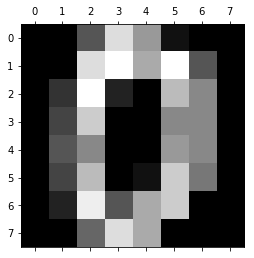

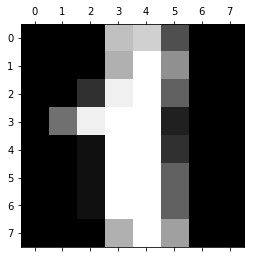

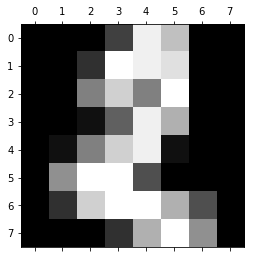

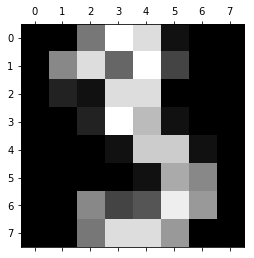

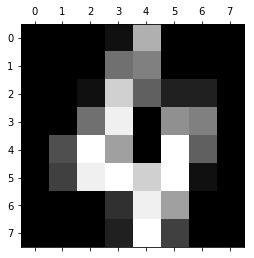

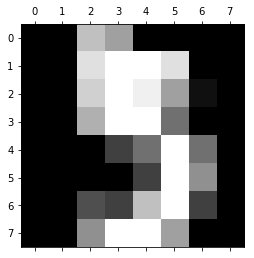

In [199]:
plt.gray()
for i in range(0, 6):
    plt.matshow(digits.images[i])
    
plt.show()

Признаки и целевая переменная

In [200]:
X_digits = digits.data
Y_digits = digits.target

Количество цифр в данных

In [201]:
n_samples = len( X_digits )
n_samples

1797

Разобьем данные на обучающую выборку и тест в пропорции 90 / 10

In [202]:
split = int( n_samples * .9 )
split

1617

Обучающая выборка

In [203]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

Формируем тестовую выборку и обучаем модель knn

In [204]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [205]:
# проверяем количество элементов
len(X_train) + len(X_test) == len(Y_train) + len(Y_test)

True

In [206]:
from sklearn import neighbors

In [207]:
# на глаз задаем количество соседей, которое будем учитывать в KNN
n_neighbors = 3

In [208]:
# определяем модель
knn = neighbors.KNeighborsRegressor( n_neighbors, weights = 'uniform' )
#'uniform': равномерный вес. Все точки в каждом районе взвешиваются одинаково.

In [209]:
# фитимся
knn.fit( X_train, Y_train )

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [210]:
# получаем предсказания. Они формата float. При оценке 7.33333333 не будет зачтено за 7
knn.predict(X_test)

array([5.        , 2.        , 8.        , 0.        , 1.        ,
       7.        , 6.        , 3.        , 2.        , 1.        ,
       7.        , 7.33333333, 6.        , 3.        , 1.        ,
       5.        , 9.        , 1.        , 7.        , 6.        ,
       8.        , 4.        , 3.        , 1.        , 4.        ,
       0.        , 5.        , 3.        , 6.        , 9.        ,
       6.        , 1.        , 7.        , 5.        , 4.        ,
       4.        , 7.        , 2.        , 2.        , 5.        ,
       7.        , 3.        , 5.        , 6.66666667, 4.        ,
       6.33333333, 0.        , 8.        , 9.        , 7.66666667,
       0.        , 1.        , 2.        , 3.        , 4.        ,
       5.        , 6.        , 7.        , 8.        , 9.        ,
       0.        , 1.        , 2.        , 3.        , 4.        ,
       5.        , 6.        , 7.        , 8.        , 9.        ,
       0.        , 1.        , 2.        , 5.33333333, 4.     

In [211]:
# поэтому округлим результаты
rounded_predict = np.round_(knn.predict(X_test), decimals=0, out=None)
rounded_predict

array([5., 2., 8., 0., 1., 7., 6., 3., 2., 1., 7., 7., 6., 3., 1., 5., 9.,
       1., 7., 6., 8., 4., 3., 1., 4., 0., 5., 3., 6., 9., 6., 1., 7., 5.,
       4., 4., 7., 2., 2., 5., 7., 3., 5., 7., 4., 6., 0., 8., 9., 8., 0.,
       1., 2., 3., 4., 5., 6., 7., 8., 9., 0., 1., 2., 3., 4., 5., 6., 7.,
       8., 9., 0., 1., 2., 5., 4., 5., 6., 7., 8., 9., 0., 9., 5., 5., 6.,
       5., 0., 9., 8., 9., 8., 4., 1., 7., 7., 3., 5., 1., 0., 0., 2., 2.,
       7., 8., 2., 0., 1., 2., 6., 3., 4., 7., 4., 3., 4., 6., 6., 6., 4.,
       9., 1., 5., 0., 9., 5., 2., 8., 2., 0., 0., 1., 7., 6., 3., 2., 1.,
       7., 4., 6., 3., 1., 3., 9., 1., 7., 6., 8., 4., 5., 1., 4., 0., 5.,
       3., 6., 9., 6., 1., 7., 5., 4., 4., 7., 2., 8., 2., 2., 5., 7., 9.,
       5., 4., 6., 3., 4., 9., 0., 8., 9., 8.])

In [212]:
# смотрим на тестовую выборку с ответами
Y_test

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [213]:
#Returns the mean accuracy on the given test data and labels.
knn.score( X_test, Y_test ) 

0.9276331979820353

In [214]:
# посчитаем accuracy_score для "округленного" ответа
from sklearn.metrics import accuracy_score
accuracy_score(rounded_predict, Y_test)

0.9388888888888889

In [215]:
# проверим точность самописной функцией
def accuracy(y, y_pred):
    y = pd.Series(list(y))
    y_pred = pd.Series(list(y_pred))
    
    # рассчитываем значения
    df = pd.concat([y,y_pred], axis=1, join='inner',ignore_index=True)
    df['TP'] = ((df[0] == df[1]))
    df['FP'] = ((df[0] != df[1]))
    df['FN'] = ((df[0] != df[1]))
    df['TN'] = ((df[0] != df[1]))
    
   
    TP = np.sum(df['TP'])
    FP = np.sum(df['FP'])
    FN = np.sum(df['FN'])
    TN = np.sum(df['TN'])
    
    
    # считаем accuracy
    accur = TP  / df.shape[0]
    
    #print('accuracy: ', accur)
    return accur

In [216]:
accuracy(rounded_predict, Y_test)

0.9388888888888889

In [217]:
faults = np.where(Y_test != rounded_predict)#[0]
faults

(array([ 11,  15,  41,  43,  45,  73, 110, 112, 148, 172, 173], dtype=int64),)

In [239]:
def faults(y, y_pred):
    y = pd.Series(list(y))
    y_pred = pd.Series(list(y_pred))
    
    # рассчитываем значения
    df = pd.concat([y,y_pred], axis=1, join='inner',ignore_index=True)
    df['TP'] = ((df[0] == df[1]))
        
    return df

In [240]:
df_accuracy = faults(rounded_predict, Y_test)
df_accuracy.tail(10)

,0,1,TP
170,5.0,5,True
171,4.0,4,True
172,6.0,8,False
173,3.0,8,False
174,4.0,4,True
175,9.0,9,True
176,0.0,0,True
177,8.0,8,True
178,9.0,9,True
179,8.0,8,True


In [241]:
df_accuracy.columns = ['rounded_predict', 'Y_test', 'TP']

In [242]:
# Посмотрим, какие цифры плохо распознались
df_accuracy[df_accuracy['TP']==False]

,rounded_predict,Y_test,TP
11,7.0,4,False
15,5.0,3,False
41,3.0,9,False
43,7.0,4,False
45,6.0,9,False
73,5.0,3,False
110,4.0,3,False
112,4.0,3,False
148,5.0,3,False
172,6.0,8,False
